In [1]:
%%capture
#@title Headings

import numpy as np
from scipy.stats import kendalltau
from itertools import permutations
import matplotlib.pyplot as plt

import seaborn as sns
import pandas as pd

plt.ion()
plt.rcParams['text.usetex'] = True

np.set_printoptions(formatter={'float':'{:6.2f}'.format})
!sudo apt update && sudo apt install cm-super dvipng texlive-latex-extra texlive-latex-recommended

seed = 0

rng = np.random.RandomState()


In [2]:
#@title Plot parameters
SMALL_SIZE = 11
MEDIUM_SIZE = 16
BIGGER_SIZE = 20

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

# Transitive Inference - define Mallows distributions

## Distances



### **Kendall distance**


Kendall distance is based on the proportion of misorderings between two ranking sequences belonging to the complete set of permutations from an initial sequence. It is also called bubble-sort distance since it is equivalent to the number of swaps that the bubble sort algorithm would take to place one list in the same order as the other list.


$$\text{kendal}(\boldsymbol{\tau}_1, \boldsymbol{\tau}_2) = \sum\limits_{i=0}^n\sum\limits_{j=i+1}^n abs([sgn(\tau_{1,i} - \tau_{1, j})\cdot sgn(\tau_{2,i} - \tau_{2, j})]^{-})$$ with
$$
sgn(x) =
\left\{\begin{array}{c}
-1 & \text{if}& x < 0  \\
0 & \text{if}& x = 0  \\
1 & \text{if}& x > 0  \\
\end{array}\right.
$$
and
$$
[x]^{-} = \left\{\begin{array}{cc} 0 & \text{if}\ x \ge 0\\ x & \text{otherwhise} \end{array}\right.
$$

 <img width="20%" src="https://docs.google.com/drawings/d/e/2PACX-1vSFWkR0pcG0AkvekwaIe1z2HWPSda7roZH4pacte4dkLS9-OSKcES2qGgVNxojFKdw0U6E0NksVVU96/pub?w=475&h=565">




In [3]:
def kendall(seq1, seq2):

    # Ensure that r1 and r2 have the same length
    assert len(seq1) == len(seq2)

    # ranking sequences
    r1 = np.argsort(seq1).reshape(1, -1)
    r2 = np.argsort(seq2).reshape(1, -1)

    diffs = np.triu(np.sign(r1 - r1.T)*np.sign(r2 - r2.T))
    d = np.sum(diffs<0)

    return d

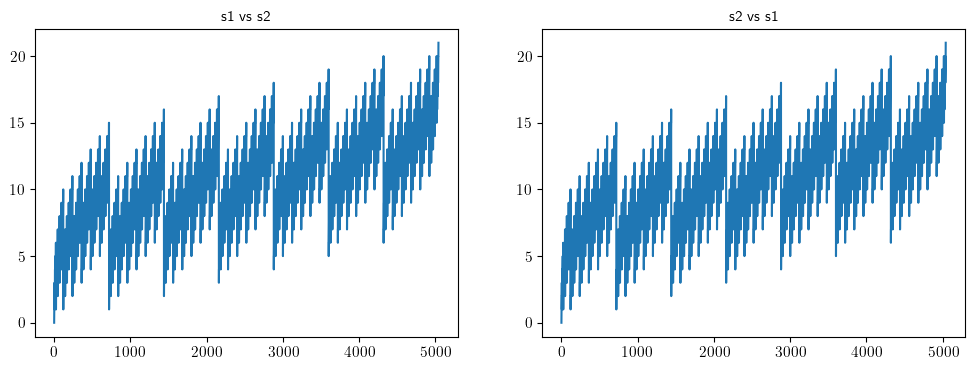

In [4]:
#@title
distance = kendall
x = np.arange(7)
perms = np.array(list(permutations(x)))
plt.figure(figsize=(12,4))

plt.subplot(121)
u = [distance(x, y) for y in perms]
_ = plt.plot(u)
_ = plt.title("s1 vs s2")

plt.subplot(122)
u = [distance(y, x) for y in perms]
_ = plt.plot(u)
_ = plt.title("s2 vs s1")

### **Ulam distance**

The Ulam distance between two permutations of length **n** is the minimum number of insertions and deletions needed to transform one sequence into the other. Equivalently, the Ulam distance is **n** minus the length of the longest common subsequence (LCS) between the permutations

In [5]:
from bisect import bisect_left
def ulam(seq1, seq2):
    n = len(seq1)
    pos = {seq1[i]: i for i in range(n)}
    lis = [0] * n
    length = 0
    for item in seq2:
        if item in pos:
            i = pos[item]
            j = bisect_left(lis, i, 0, length)
            lis[j] = i
            length = max(length, j + 1)
    return n - length

[[0 1 2 ... 4 5 6]
 [0 1 2 ... 4 6 5]
 [0 1 2 ... 5 4 6]
 ...
 [6 5 4 ... 1 2 0]
 [6 5 4 ... 2 0 1]
 [6 5 4 ... 2 1 0]]


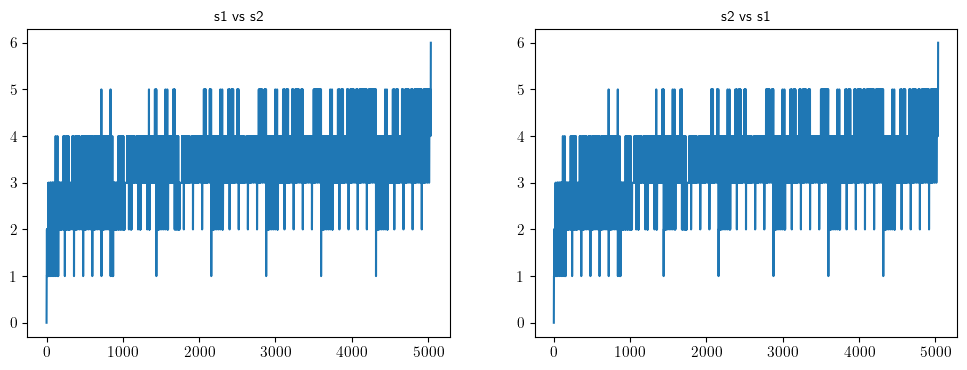

In [6]:
#@title
distance = ulam
x = np.arange(7)
perms = np.array(list(permutations(x)))
plt.figure(figsize=(12,4))

plt.subplot(121)
u = [distance(x, y) for y in perms]
_ = plt.plot(u)
_ = plt.title("s1 vs s2")

plt.subplot(122)
u = [distance(y, x) for y in perms]
_ = plt.plot(u)
_ = plt.title("s2 vs s1")

print(perms)

### **Hamming distance**

In [7]:
#@title
def hamming(seq1, seq2):
    seq1 = np.argsort(seq1)
    seq2 = np.argsort(seq2)

    return np.sum(~(seq1 == seq2))

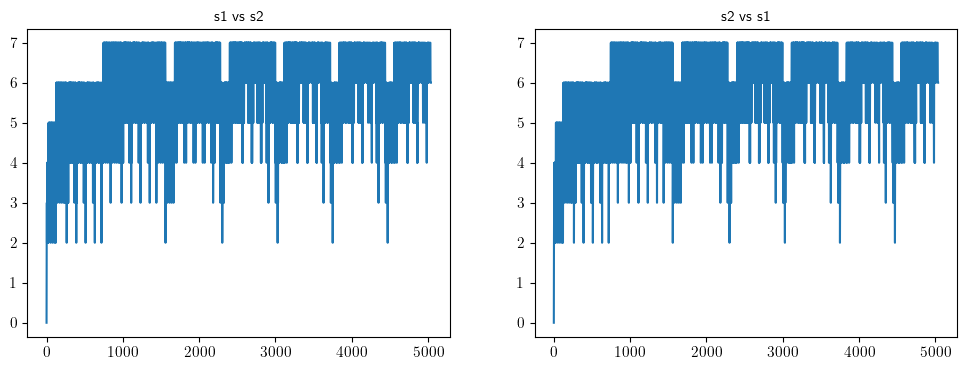

In [8]:
#@title
distance = hamming
x = np.arange(7)
perms = np.array(list(permutations(x)))
plt.figure(figsize=(12,4))

plt.subplot(121)
u = [distance(x, y) for y in perms]
_ = plt.plot(u)
_ = plt.title("s1 vs s2")

plt.subplot(122)
u = [distance(y, x) for y in perms]
_ = plt.plot(u)
_ = plt.title("s2 vs s1")

### **Spearman's footrule distance**

In [9]:
def footrule(seq0, seq1):

    # Ensure that r1 and r2 have the same length
    assert len(seq0) == len(seq1)

    n = len(seq0)
    # ranking sequences
    r1 = np.argsort(seq0).reshape(-1, 1)
    r2 = np.argsort(seq1).reshape(-1, 1)

    r2_idcs = np.argwhere(r1 == r2.T).astype(float)
    r1r2_dists = np.subtract(*r2_idcs.T)

    dists = np.abs(r1r2_dists)

    d = np.sum(dists)

    return d


In [10]:
a = [0,1,2,3,4,5]
b = [0,2,1,3,4,5]
footrule(a, b)

2.0

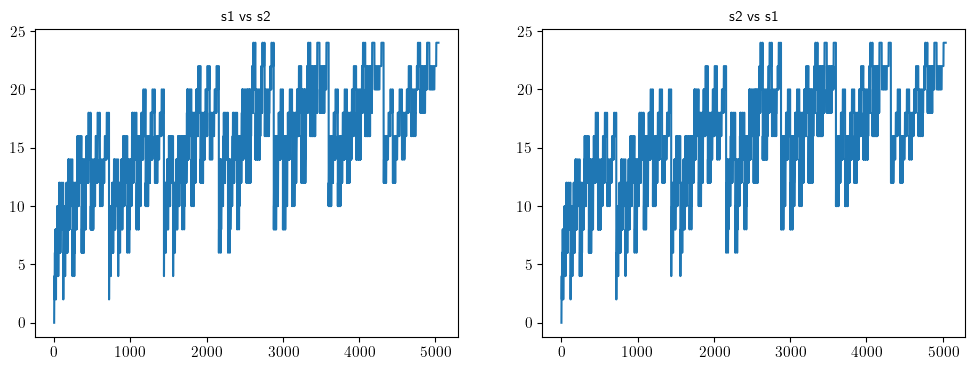

In [11]:
#@title
distance = footrule
x = np.arange(7)
perms = np.array(list(permutations(x)))
plt.figure(figsize=(12,4))

plt.subplot(121)
u = [distance(x, y) for y in perms]
_ = plt.plot(u)
_ = plt.title("s1 vs s2")

plt.subplot(122)
u = [distance(y, x) for y in perms]
_ = plt.plot(u)
_ = plt.title("s2 vs s1")

### **Spearman's rank correlation distance**

In [12]:
def s2(seq0, seq1):
    # Ensure that r1 and r2 have the same length
    assert len(seq0) == len(seq1)

    n = len(seq0)
    # ranking sequences
    r1 = np.argsort(seq0)
    r2 = np.argsort(seq1)

    return np.sum((r1 - r2)**2)


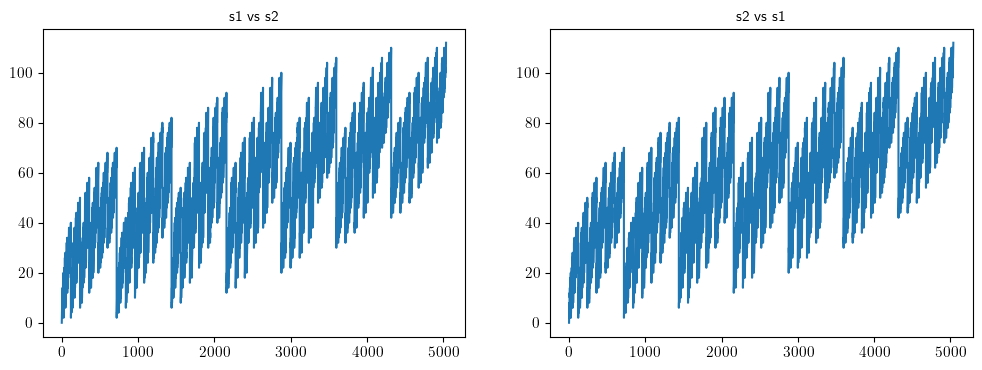

In [13]:
#@title
distance = s2
x = np.arange(7)
perms = np.array(list(permutations(x)))
plt.figure(figsize=(12,4))

plt.subplot(121)
u = [distance(x, y) for y in perms]
_ = plt.plot(u)
_ = plt.title("s1 vs s2")

plt.subplot(122)
u = [distance(y, x) for y in perms]
_ = plt.plot(u)
_ = plt.title("s2 vs s1")

### **Spearman derived distance**

In [14]:
def sder(seq0, seq1, gamma = 0.4):
    # Ensure that r1 and r2 have the same length
    assert len(seq0) == len(seq1)

    n = len(seq0)
    # ranking sequences
    r1 = np.argsort(seq0)
    r2 = np.argsort(seq1)

    return np.sum(np.abs(r1 - r2)**gamma)


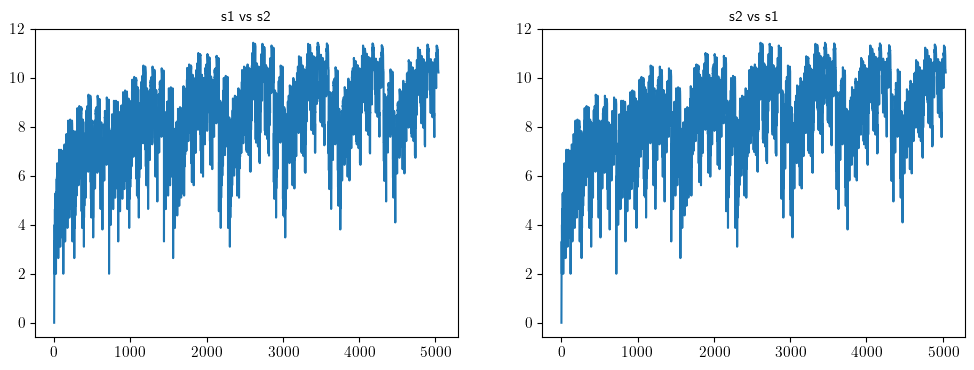

In [15]:
#@title
distance = sder
x = np.arange(7)
perms = np.array(list(permutations(x)))
plt.figure(figsize=(12,4))

plt.subplot(121)
u = [distance(x, y) for y in perms]
_ = plt.plot(u)
_ = plt.title("s1 vs s2")

plt.subplot(122)
u = [distance(y, x) for y in perms]
_ = plt.plot(u)
_ = plt.title("s2 vs s1")

### **Cayley distance**

In [16]:
def cayley(seq1, seq2):
    seq1 = list(seq1)
    seq2 = list(seq2)
    assert len(seq1) == len(seq2)
    n = len(seq1)
    transpositions = 0
    for i in range(n):
        if seq1[i] != seq2[i]:
            j = seq1.index(seq2[i])
            seq1[i], seq1[j] = seq1[j], seq1[i]
            transpositions += 1
    return transpositions

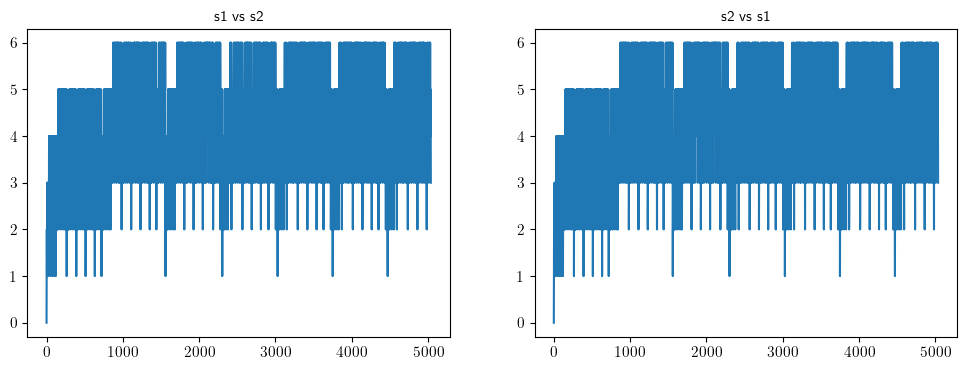

In [17]:
#@title
distance = cayley
x = np.arange(7)
perms = np.array(list(permutations(x)))
plt.figure(figsize=(12,4))

plt.subplot(121)
u = [distance(x, y) for y in perms]
_ = plt.plot(u)
_ = plt.title("s1 vs s2")

plt.subplot(122)
u = [distance(y, x) for y in perms]
_ = plt.plot(u)
_ = plt.title("s2 vs s1")

## Mallows distribution

Distribution of the permutations of a sequence based on a distance $\mathcal{K}$ between permutations (one of the above):

$$p(\boldsymbol{\tau}_i| \beta, \mathbf{c}) \approx  e^{-\beta\ \mathcal{K}(\boldsymbol{\tau}_i, \mathbf{c})}$$

with $$\mathcal{P}=\{\boldsymbol{\tau}_1, \boldsymbol{\tau}_2, \cdots, \boldsymbol{\tau}_i\dots\boldsymbol{\tau}_N\}$$

The consensus central point $\mathbf{c}$ can be found from a given sample of permutations as:

$$\mathbf{c}_{MLE} = \underset{c}{\operatorname{arg\,min}}{\sum\limits_k\mathcal{K}(\boldsymbol{s}_k, \mathbf{c})}$$

with

$$\boldsymbol{s}_k  \overset{{\scriptscriptstyle R}}{\leftarrow} \mathcal{P} $$


Distance to be use in the notebook.
choose between:

* **kendall**
* **ulam**
* **hamming**
* **footrule**
* **s2**
* **cayley**

### Mallow series

In [18]:
#@title Building

def mallows(tau, central, beta, distance=kendall):
    return np.exp(- beta * distance(central, tau))

# build the whole population of permutations with probabilities
def mallows_series(beta, n = 6, distance=distance, labels=None,):
    if labels is None:
        labels = np.array(['A','B','C','D','E','F'])
    labels = labels[:n]
    central = np.arange(n)
    perms = np.array(list(permutations(central)))
    dists = np.hstack([distance(central, tau) for tau in perms])
    probs = np.hstack([mallows(tau, central, beta=beta, distance=distance) for tau in perms])
    probs = probs/probs.sum()
    return central, perms, labels, dists, probs


### Probabilities of pairwise relative rank decisions


In [19]:

def rank_fun(x):
  return 0.5 + 0.5*np.abs(x/np.abs(x).max())

def computePairProbs(central, perms, probs,
                     labels=np.array(['A','B','C','D','E','F'])):
    if labels is None:
        labels = np.array(['A','B','C','D','E','F'])
    pairs = {}
    antipairs = {}
    dist = {}
    for i in central:
        iw = np.argwhere(perms == i)
        for j in central[(i+1):]:
            dist[(i, j)] = j - i
            jw = np.argwhere(perms == j)
            pairs[(i, j)] = sum(probs[(jw - iw)[:, 1] > 0])
            antipairs[(i, j)] = sum(probs[(jw - iw)[:, 1] < 0])


    # build dataframe of pairs
    data = []
    for k, v in pairs.items():
        av = antipairs[k]
        data.append([dist[k], k, f"{labels[k[0]]}{labels[k[1]]}", v, av])
    df = pd.DataFrame(data, columns=["dist", "pair_idx", "pair", "prob", "aprob"])
    df["condprob"] = df.groupby("dist")["prob"].apply(lambda x : x/x.sum())
    df["maxcondprob"] = df.groupby("dist")["prob"].apply(lambda x : x/x.max())
    df["acondprob"] = df["prob"]/(df["prob"] + df["aprob"])
    df["odd"] = df["prob"]/(df["aprob"])
    df["logodd"] = np.log(df["prob"]/(df["aprob"]))
    df["minusprob"] = (df["prob"]- df["aprob"])
    df["minusprobcond"] = (df["prob"]- df["aprob"]) / (df["prob"]+ df["aprob"])
    df.sort_values(by=['dist'], inplace=True)

    return df

### Plottings

In [20]:
#@title Distribution plotting functions

def plot_distribution(dist, probs, beta, ax=None):
    if ax is None:
        ax = plt.subplot(111)
    pprobs = pd.DataFrame({
        "Distance": dist.astype(int),
        "hue":np.ones_like(dist),
        "Prob.": [np.sum(probs[dist==k]) for k in kend],
        "count": [np.sum(dist==k) for k in kend],
        })
    sns.barplot(ax=ax, x="Distance", y="Prob.", hue="hue", data=pprobs)
    plt.legend([], [], frameon=False)
    for k,p in enumerate(ax.patches):
        _x = p.get_x() + p.get_width() / 2
        _y = p.get_y() + p.get_height() +0.03
        value = '{:3d}'.format(pprobs["count"].iloc[k])
        ax.text(_x, _y, value, ha="center")
    ax.set_title(rf"$\beta={beta:3.1f}$", fontsize=20)
    mx = pprobs["Distance"].max()
    ax.set_xlim( -mx//6, mx + mx//8)
    ax.set_ylim(-.1, 1.1)
    ax.set_yticks([0, 0.5, 1])


def plot_parametric_distribution(ax=None, n=6, distance=kendall, betas = None, legend=True):
    slegend = "auto" if legend else None

    if ax is None:
        ax = plt.subplot(111)
    if betas == None:
        betas = np.linspace(0.2, 2, 6)

    # ax.set_title(f"Permutations of  {n}-token sequences\nDistance = {distance.__name__}")


    df = pd.DataFrame()
    for beta in betas:
        central, perms, labels, dist, probs = mallows_series(beta, n=n, distance=distance)
        dist_types = np.unique(dist)
        pprobs = pd.DataFrame({
            "Distance": dist_types.astype(int),
            "Prob.": [np.sum(probs[k==dist]) for k in dist_types],
            "count": [np.sum(k==dist) for k in dist_types],
            "beta": np.round(beta, 1),
        })
        df = pd.concat([df, pprobs])
    means = df.groupby(["Distance","beta"])["Prob."].apply("mean").reset_index()
    if len(betas) > 1:

        sns.lineplot(ax=ax, x="Distance", y="Prob.", hue="beta", data=means,
                     legend=slegend)
    else:
        sns.lineplot(ax=ax, x="Distance", y="Prob.", hue="beta",
                     palette=['black'], data=means, legend=slegend)
        sns.scatterplot(ax=ax, x="Distance", y="Prob.", hue="beta",
                     palette=['black'], data=means, legend=False)


    ax.set_xlim(-dist.max()*0.2, int(dist.max()*1.5))
    ax.set_xticks(df.Distance.unique())

    return df

In [21]:
#@title Plotting functions for relative rank decision pairs
def plot_pairs(df, ax = None, yname=None, ylabel=None, legend=True, alpha=1, s=100, color=None):
    if ax is None:
        fig = plt.figure(figsize=(8,5))
        ax = fig.add_subplot(111)
    if yname is None:
        yname = "acondprob"
    df = df.rename(columns={"dist": "Symbolic\nDistance"})

    haslegend='auto' if legend is True else None
    palette = "rocket" if color is None else None

    g = sns.lineplot(ax=ax, data=df, lw=2,  x="pair", y=yname, hue="Symbolic\nDistance",
                     palette=palette, color=color, legend=haslegend, alpha=alpha)

    sns.scatterplot(ax=ax, s=s, data=df, x="pair", y=yname, hue="Symbolic\nDistance", palette=palette,
                    legend=None, color=color, alpha=alpha)
    ax.set_ylim([0.65, 1.1])
    ax.set_yticks([0.7, 0.8, 0.9, 1])
    ax.set_xlim([-2, 16])
    ax.set_xlabel("")
    if legend: plt.legend(loc='upper left')

    if ylabel is None:
        ax.set_ylabel("Prob.")
    else:
        ax.set_ylabel(ylabel)


# Analysis of mallows distribution given a specific metric

In [22]:
#@title Metric
distance = s2


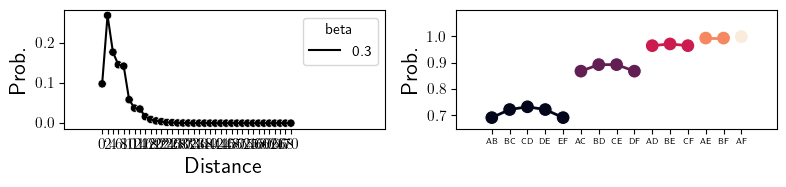

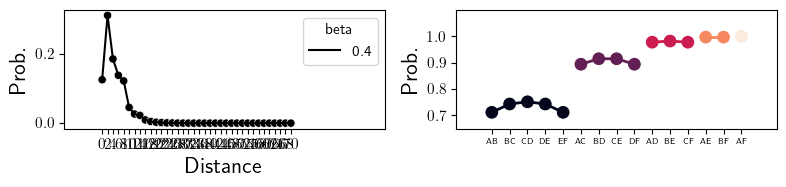

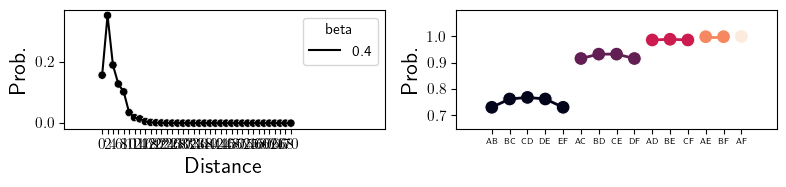

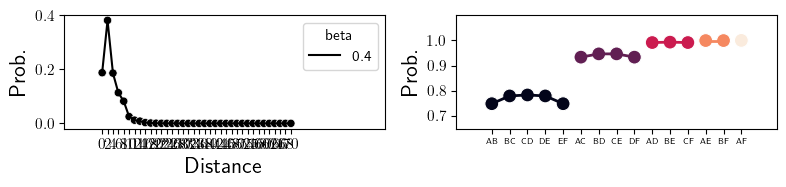

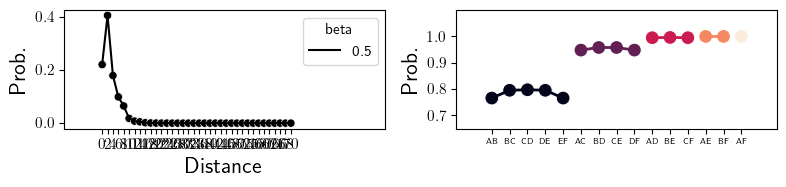

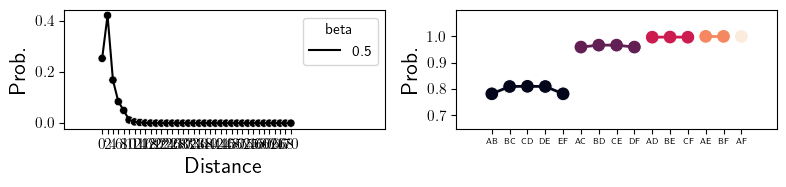

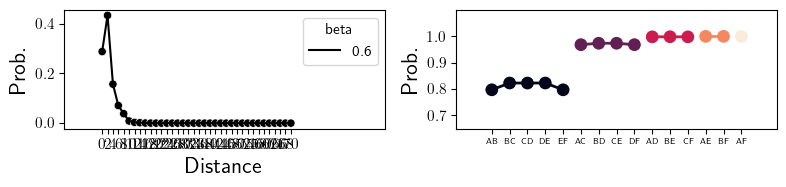

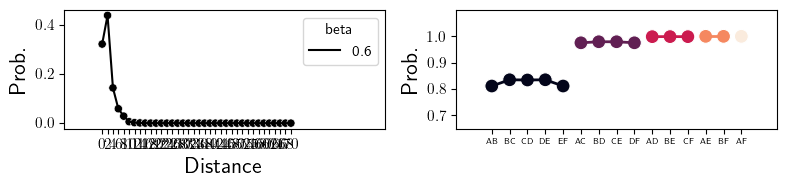

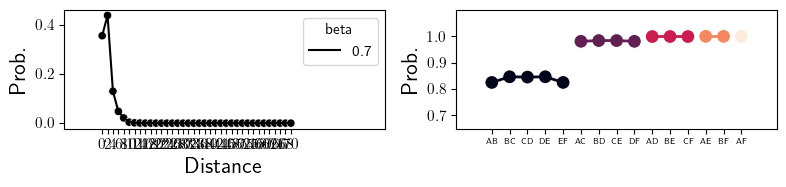

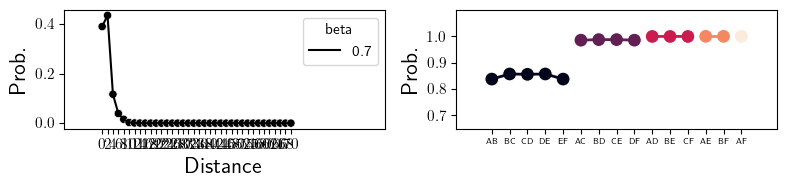

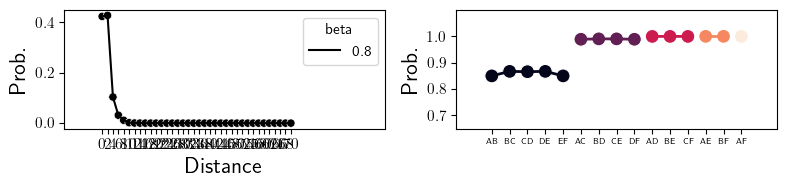

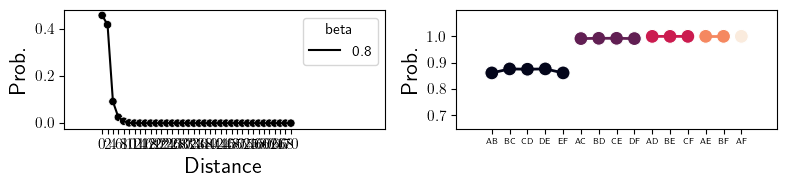

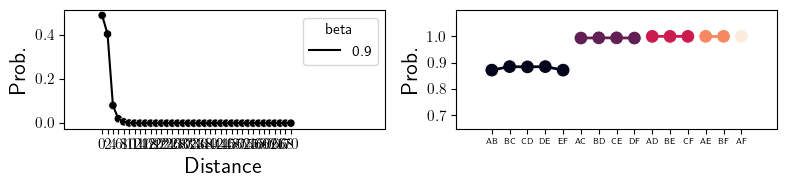

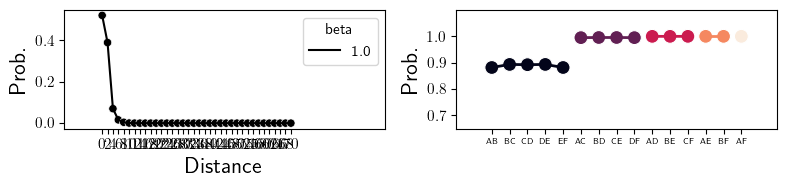

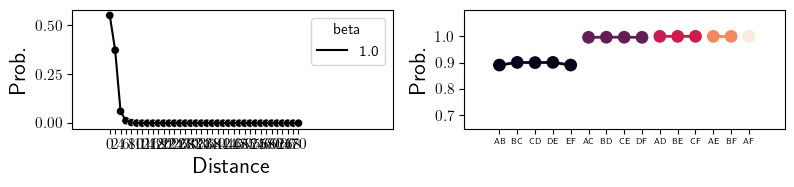

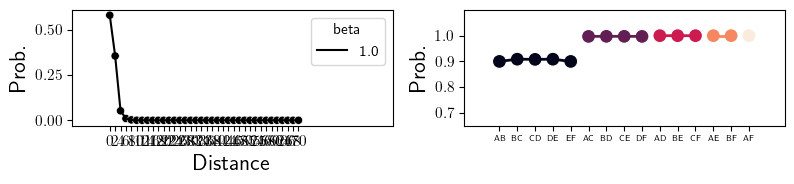

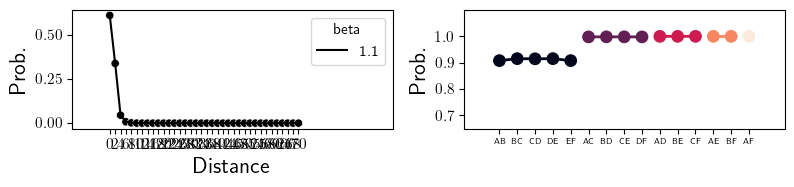

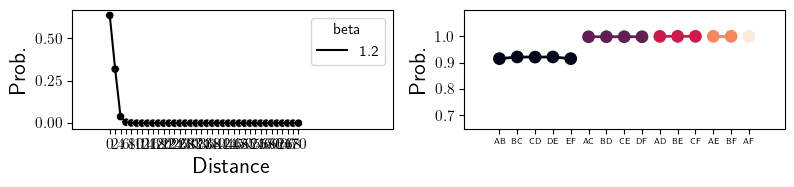

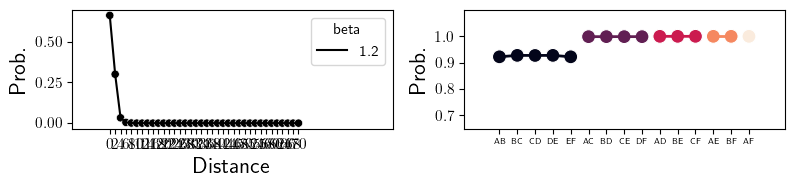

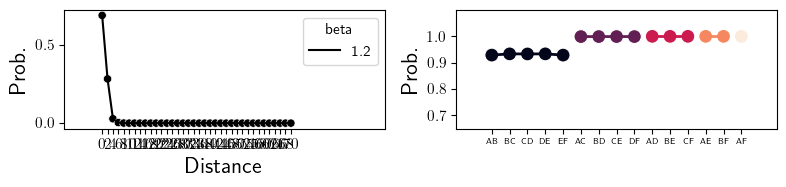

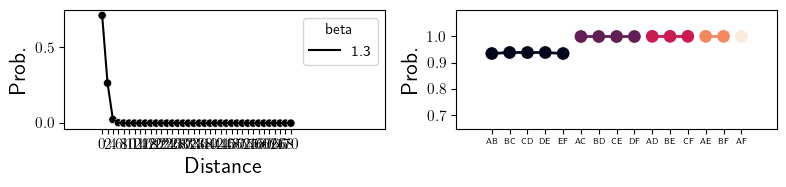

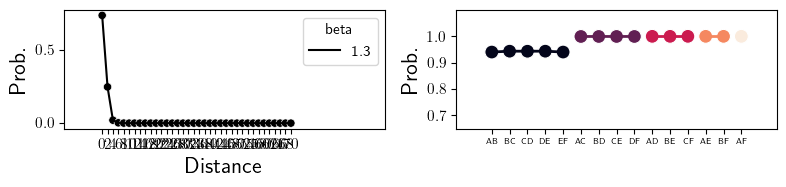

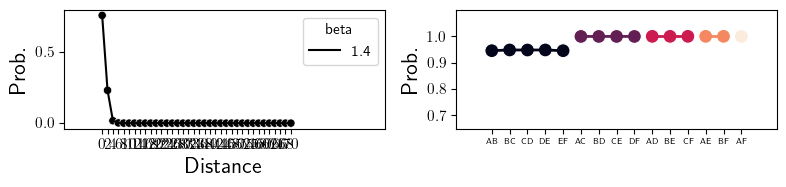

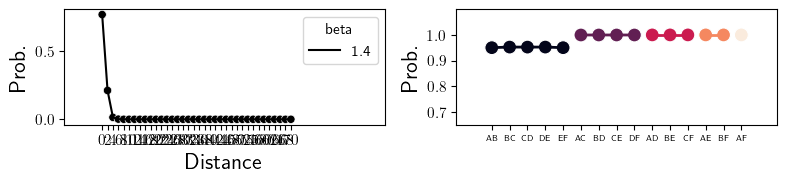

In [23]:
#@title Plot relative rank decisions for a range of betas
import warnings
warnings.filterwarnings('ignore')
from IPython.display import display


for beta in np.arange(0.3,1.5, 0.05): # spearman
#for beta in np.arange(0.6, 1, 0.05): # kendall
#for beta in np.arange(1, 4.5, 0.5): # ulam
    fig = plt.figure(figsize=(8, 2))

    ax = fig.add_subplot(121)
    central, perms, labels, dists, probs = mallows_series(beta, distance=distance)
    df = plot_parametric_distribution(distance=distance, betas=[beta], ax=ax)
    ax = fig.add_subplot(122)
    df = computePairProbs(central, perms, probs)
    plot_pairs(df, ax, legend=False)
    ax.tick_params(axis='x', labelsize=6)
    fig.tight_layout()

    display(fig)
    plt.close(fig)



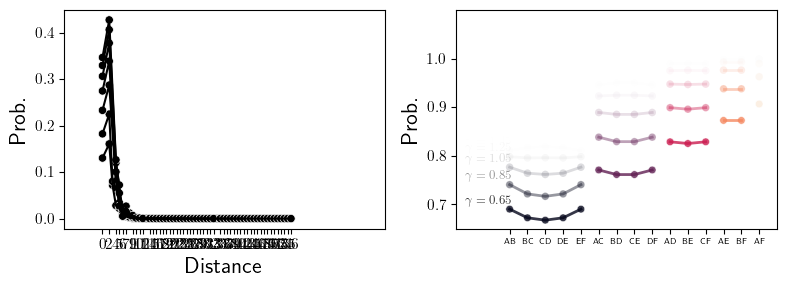

In [24]:
#@title Plot relative rank decisions for a range of gammas (sder rule)
import warnings
warnings.filterwarnings('ignore')
from IPython.display import display

beta = 0.7

fig = plt.figure(figsize=(8, 3))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

gammas =  np.arange(0.65, 2, 0.2)
alphas = np.exp(-0.5*(.3**-2)*(gammas - 0.45)**2)
for i, gamma in enumerate(gammas):
    def footrule_gamma(x, y):
        return sder(x, y, gamma = gamma)
    distance = footrule_gamma

    central, perms, labels, dists, probs = mallows_series(beta, distance=distance)
    df = plot_parametric_distribution(distance=distance, betas=[beta], ax=ax1, legend=False)
    df = computePairProbs(central, perms, probs)
    plot_pairs(df, ax2, legend=False, s=30, alpha=alphas[i])

    tx = df.query("pair=='AB' and dist==1").acondprob[0]
    ax2.text(-2.5, tx+0.01, f"$\gamma={gamma:.2f}$", alpha=alphas[i], size=9)
ax2.set_xlim(-3, 15)
ax2.tick_params(axis='x', labelsize=6)
fig.tight_layout()
display(fig)
plt.close(fig)


In [25]:
df.query("pair=='AB' and dist==1").acondprob[0]

0.8225683744264383

In [26]:
np.arange(len(gammas))/(len(gammas)-1)

array([  0.00,   0.17,   0.33,   0.50,   0.67,   0.83,   1.00])

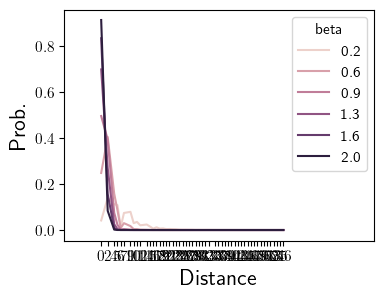

In [27]:
#@title Distributions over betas

plt.figure(figsize=(4, 3))
df = plot_parametric_distribution(distance=distance)

In [28]:
#@title Parameters
beta = 0.8

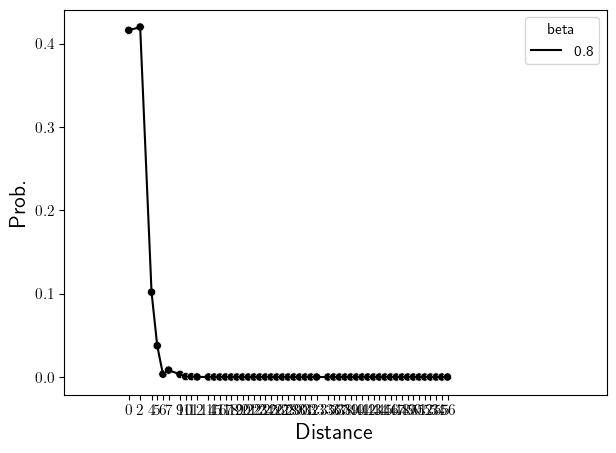

In [29]:
#@title Plot distribution with chosen beta
fig1 = plt.figure(figsize=(7,5))
ax = fig1.add_subplot(111)
df = plot_parametric_distribution(distance=distance, betas=[beta], ax=ax)


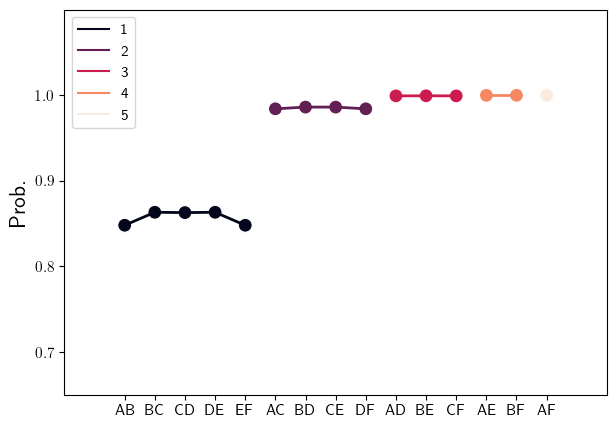

In [30]:
#@title Plot relative rank decisions for a single value of beta

fig2 =plt.figure(figsize=(7,5))
ax = fig2.add_subplot(111)
central, perms, labels, dists, probs = mallows_series(beta, distance=distance)
df = computePairProbs(central, perms, probs)
plot_pairs(df, ax)

In [31]:
#@title Print probabilities of relative rank decision for each pair
pair_idcs = df["pair_idx"]
pair_labels = df["pair"]
df

,dist,pair_idx,pair,prob,aprob,condprob,maxcondprob,acondprob,odd,logodd,minusprob,minusprobcond
0,1,"(0, 1)",AB,0.848119,1.518809e-01,0.197895,0.982420,0.848119,5.584106e+00,1.719924,0.696238,0.696238
5,1,"(1, 2)",BC,0.863296,1.367045e-01,0.201436,1.000000,0.863296,6.315049e+00,1.842935,0.726591,0.726591
9,1,"(2, 3)",CD,0.862876,1.371242e-01,0.201338,0.999514,0.862876,6.292661e+00,1.839384,0.725752,0.725752
12,1,"(3, 4)",DE,0.863296,1.367045e-01,0.201436,1.000000,0.863296,6.315049e+00,1.842935,0.726591,0.726591
14,1,"(4, 5)",EF,0.848119,1.518809e-01,0.197895,0.982420,0.848119,5.584106e+00,1.719924,0.696238,0.696238
1,2,"(0, 2)",AC,0.984200,1.579956e-02,0.249744,0.997952,0.984200,6.229289e+01,4.131847,0.968401,0.968401
6,2,"(1, 3)",BD,0.986220,1.377980e-02,0.250256,1.000000,0.986220,7.157002e+01,4.270676,0.972440,0.972440
10,2,"(2, 4)",CE,0.986220,1.377980e-02,0.250256,1.000000,0.986220,7.157002e+01,4.270676,0.972440,0.972440
13,2,"(3, 5)",DF,0.984200,1.579956e-02,0.249744,0.997952,0.984200,6.229289e+01,4.131847,0.968401,0.968401
2,3,"(0, 3)",AD,0.999335,6.649918e-04,0.333324,0.999914,0.999335,1.502778e+03,7.315071,0.998670,0.998670


## Sampling

In [32]:
print(distance.__name__)
print(beta)


footrule_gamma
0.8


In [33]:
#@title Sampling manager
from string import  ascii_uppercase
all_labels = ascii_uppercase

def sample_from_probs(probs, n):
    cumprobs = np.hstack([0, np.cumsum(probs)])
    tosses = rng.rand(n)
    toss_idcs = [np.argwhere(
        (cumprobs[:-1]<x)  &  (cumprobs[1:]>=x)
        ).ravel()[0] for x in tosses]
    return toss_idcs

class Sample:
    def __init__(self, beta, n = None, labels = None, distance = None ):

        if n is None: n = 6
        if distance is None: distance = kendall

        central, perms, labels, dist, probs = mallows_series(
            beta=beta, n=n, distance=distance, labels=labels)

        self.pairprobs = computePairProbs(
            central, perms, probs, labels)

        self.pair_idcs = self.pairprobs["pair_idx"]
        self.pair_labels = self.pairprobs["pair"]

        self.beta = beta
        self.n = n
        self.perms = perms
        self.probs = probs
        self.dist = dist
        self.labels = labels

    def get_samples(self, n_samples=None):
        """ Sample from mallows

            Arguments:
                n_samples: the number of samples

            Returns:
                toss_idcs: indices of permutations which are chosen from the
                    overall distribution
                perms[toss_idcs]: permutations which are chosen from the
                    overall distribution
                dist[toss_idcs]: distances of the chosen permutations from the
                    central point of the overall distribution
        """

        # sampling sequences based on probabilities
        toss_idcs = sample_from_probs(self.probs, n_samples)

        return toss_idcs, self.perms[toss_idcs], self.dist[toss_idcs]

    def get_sample_df(self, n_samples):
        _, sampled_perms, _ = self.get_samples(n_samples)

        data = []
        for pair, label in zip(self.pair_idcs, self.pair_labels):
            test = [self.get_pair_rank(pair, x) for x in sampled_perms]
            data.append((label, sum(1*test)/len(test), pair))

        return pd.DataFrame({"pair": [x[0] for x in data], "prob": [x[1] for x in data],
                        "dist": [np.abs(x[2][1] - x[2][0]) for x in data]})

    def get_pair_rank(self, pair, sequence, noise = 0.0):
        ''' get which element of a pair is upper in rank
            with respect to a rank sequence.

            Arguments:
                pair: the two element to be compared on a rank sequence
                rank_sequence: the sequence which tells the rank
                noise: the probability to get the wrong relative
                    ranking for the pair
        '''
        aw = [np.argwhere(sequence==p)[0][0] for p in pair]
        res = 1*((aw[1] - aw[0]) > 0)
        p = [0, 0]
        p[res] = 1 - noise
        p[1 - res] = noise
        return rng.choice([0, 1], p = p)


### Sample ranking decisions using a metric and a value of beta


In [34]:
#@title Build sampled dataset

s = Sample(n=6, beta = beta, labels=all_labels, distance=distance)
dd = s.get_sample_df(n_samples=1500)
dd

,pair,prob,dist
0,AB,0.846000,1
1,BC,0.854000,1
2,CD,0.872000,1
3,DE,0.872667,1
4,EF,0.854667,1
5,AC,0.978000,2
6,BD,0.990000,2
7,CE,0.991333,2
8,DF,0.980000,2
9,AD,0.998667,3


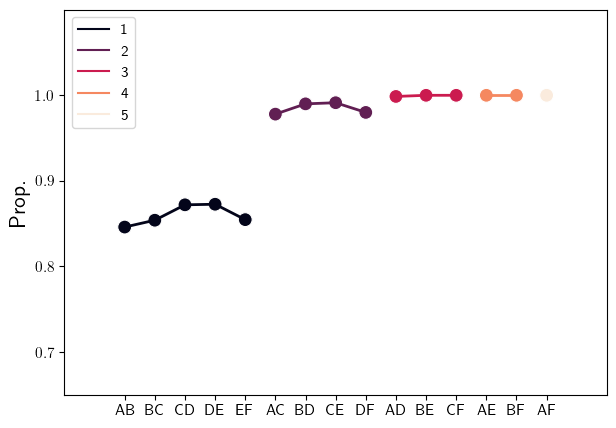

In [35]:
#@title plot relative rank decision pairs
plt.figure(figsize=(7,5))
ax = plt.subplot(111)

plot_pairs(dd, ax=ax, yname="prob", ylabel="Prop.")


In [36]:
n = 6
M = np.zeros([n, n])
for d in range(1, n):
    diag = dd.loc[dd["dist"]==d, 'prob'].to_numpy()
    for i, (r, c) in enumerate(zip(range(n-d),range(d, n))):
        M[r,c] = diag[i]
M = M + M.T


# Model Selection

In [37]:
#@title plot models
def plot_models(df, ax=None, xaxis=False):
    fig = None
    df.models = [f"{str(x):>20}" for x in df.models]
    if ax is None:
        fig = plt.figure(figsize=(6,1+len(df.models)//4))
        ax = fig.add_subplot(111)

    #df = df.sort_values(by="model_num")
    sns.barplot(ax=ax, data=df, x="likelihood", y="models",
                hue="model_num", dodge=False, width=0.8)
    sns.despine(left=True, bottom=True)
    ax.set_xlim(-0.1, 1.8)
    ax.set_ylim(len(df.models)+1, -1)
    ax.set_xticks(np.linspace(0,1,5))
    ax.set_ylabel("")
    if xaxis == False:
        ax.set_xticks([])
        ax.set_xlabel("")

    if fig is not None:
        fig.savefig(f"ti-model-{len(df.models)}.svg")


In [38]:
from itertools import combinations, chain

def split_tuples(x):
    n = len(x)
    res = [[tuple(k for k in x[i:i+j])
            for i in range(0, n - (j - 1))]
           for j in range(2, n + 1)]
    return res

def get_models(pairs):
    # Flatten the list of tuples
    tuples = [x for m in split_tuples(x) for x in m]
    # Flatten the list of pairs
    fpairs = [x for pair in pairs for x in pair]
    # Filter out tuples that are not in the list of pairs
    tuples = [tp for tp in tuples if all(x in fpairs for x in tp)]
    if len(pairs) > 1:
        # Generate all possible combinations of tuples
        tuples = list(chain.from_iterable([sorted(combinations(tuples, i)) for i in range(len(tuples))]))
        # Filter out combinations that do not contain all pairs
        tuples = [sorted(tp) for tp in tuples if set(chain.from_iterable(tp)) == set(fpairs)]
        # Filter out combinations that contain duplicates
        tuples = [tp for tp in tuples
              if len(tp)==1 or len(list(chain.from_iterable(tp))) == len(set(pairs)) + (len(tp))]
        # Filter out combinations wich contain pairs not present in the argument list of pairs
        tuples = [tp for tp in tuples if all([x in pairs for ttp in tp for x in [ttp[i:i+2] for i in range(len(ttp)-1)]])]
        # Filter out combinations which contain overlapping subgroups
        tuples = [tp for tp in tuples if  all(tp[i+1][0] >= tp[i][-1] for i in range(len(tp)-1))]

    else:
        tuples = [tuples]
    return tuples

get_models([(0, 1), (1,2), (2,3), (3,4), (4,5)])

[[(0, 1, 2, 3, 4, 5)],
 [(0, 1), (1, 2, 3, 4, 5)],
 [(0, 1, 2), (2, 3, 4, 5)],
 [(0, 1, 2, 3), (3, 4, 5)],
 [(0, 1, 2, 3, 4), (4, 5)],
 [(0, 1), (1, 2), (2, 3, 4, 5)],
 [(0, 1), (1, 2, 3), (3, 4, 5)],
 [(0, 1), (1, 2, 3, 4), (4, 5)],
 [(0, 1, 2), (2, 3), (3, 4, 5)],
 [(0, 1, 2, 3), (3, 4), (4, 5)],
 [(0, 1, 2), (2, 3, 4), (4, 5)],
 [(0, 1), (1, 2), (2, 3), (3, 4, 5)],
 [(0, 1), (1, 2), (2, 3, 4), (4, 5)],
 [(0, 1), (1, 2, 3), (3, 4), (4, 5)],
 [(0, 1, 2), (2, 3), (3, 4), (4, 5)],
 [(0, 1), (1, 2), (2, 3), (3, 4), (4, 5)]]

In [39]:
#@title Compute probabilities of pairs per model on a set of obseved pairs
import itertools

def compute_probs(observed_pairs):
    observed_pairs = sorted(observed_pairs)
    models = get_models(observed_pairs)
    tot_models = len(models)
    tot_pairs = len(observed_pairs)
    probs = np.zeros([tot_models, tot_pairs])
    n_submodels = []
    for model_id in range(tot_models):
        model = models[model_id]
        n_submodels.append(len(model))
        for submodel in model:
            for pair_id in range(tot_pairs):
                pair = tuple(observed_pairs[pair_id])
                csum = np.sum([
                    1*(tuple(submodel[i:i+2]) == pair )
                    for i in range(len(submodel)-1)
                    ])
                probs[model_id, pair_id] += csum
    probs = probs/np.sum(probs, 1).reshape(-1, 1)
    return probs, models, np.array(n_submodels), observed_pairs


In [40]:
probs, models, n_submodels, pairs = compute_probs([(0,1), (1,2)])
models

[[(0, 1, 2)], [(0, 1), (1, 2)]]

In [41]:
#@title Compute BIC as far as pairs are presented (in a random order)
n = 6
pairs = [(i,(i+1)) for i in range(n-1)]
labels = 'ABCDEFG'
pairs_seq = [0,1,3,4,2]


models_df = pd.DataFrame()
models_probs_df = pd.DataFrame()
observed_pairs = []
observed_pairs_labels = []
for idx in range(5):
    pair = pairs[pairs_seq[idx]]
    pair_label = "".join([labels[l] for l in  pair])
    observed_pairs_labels.append(pair_label)
    observed_pairs.append(pair)
    probs, models, n_submodels, observed_pairs = compute_probs(observed_pairs)

    models_labels = [
        " - ".join([
            "".join([labels[l] for l in submodel]) for submodel in model
         ]) for model in models
        ]

    likelihoods = np.prod(probs, 1)
    loglikelihoods = np.log(np.prod(probs, 1))
    BICs = n_submodels*np.log(len(observed_pairs)) - 2*loglikelihoods
    Accuracies =  np.sum((probs>0), 1)/ len(observed_pairs)

    pprobs = np.zeros([probs.shape[0], n-1])
    for i, c in enumerate(pairs_seq[:probs.shape[1]]):
        pprobs[:, c] = probs[:, i]

    df = pd.DataFrame({
        "BIC": BICs,
        "likelihood": likelihoods,
        "loglikelihood": loglikelihoods,
        "Accuracy": Accuracies,
        "F": BICs - Accuracies,
        "model_num": n_submodels,
        "pairs": str(observed_pairs_labels),
        "pairs_n": idx,
        "models": models_labels,
        "models_n": n_submodels,
    })
    pdf = pd.DataFrame()

    pdf = pd.DataFrame(pprobs, columns=["AB", "BC", "CD", "DE", "EF"])
    pdf["pairs"] = str(observed_pairs_labels)
    pdf["pairs_n"] = idx
    pdf["models"] = models_labels
    pdf["model_num"] = n_submodels

    models_probs_df = pd.concat((models_probs_df, pdf))
    models_df = pd.concat((models_df, df))


In [42]:
observed_pairs

[(0, 1), (1, 2), (2, 3), (3, 4), (4, 5)]

# New Section

In [43]:
models_probs_df.query("pairs_n == 0").iloc[:,:5]

,AB,BC,CD,DE,EF
0,1.0,0.0,0.0,0.0,0.0


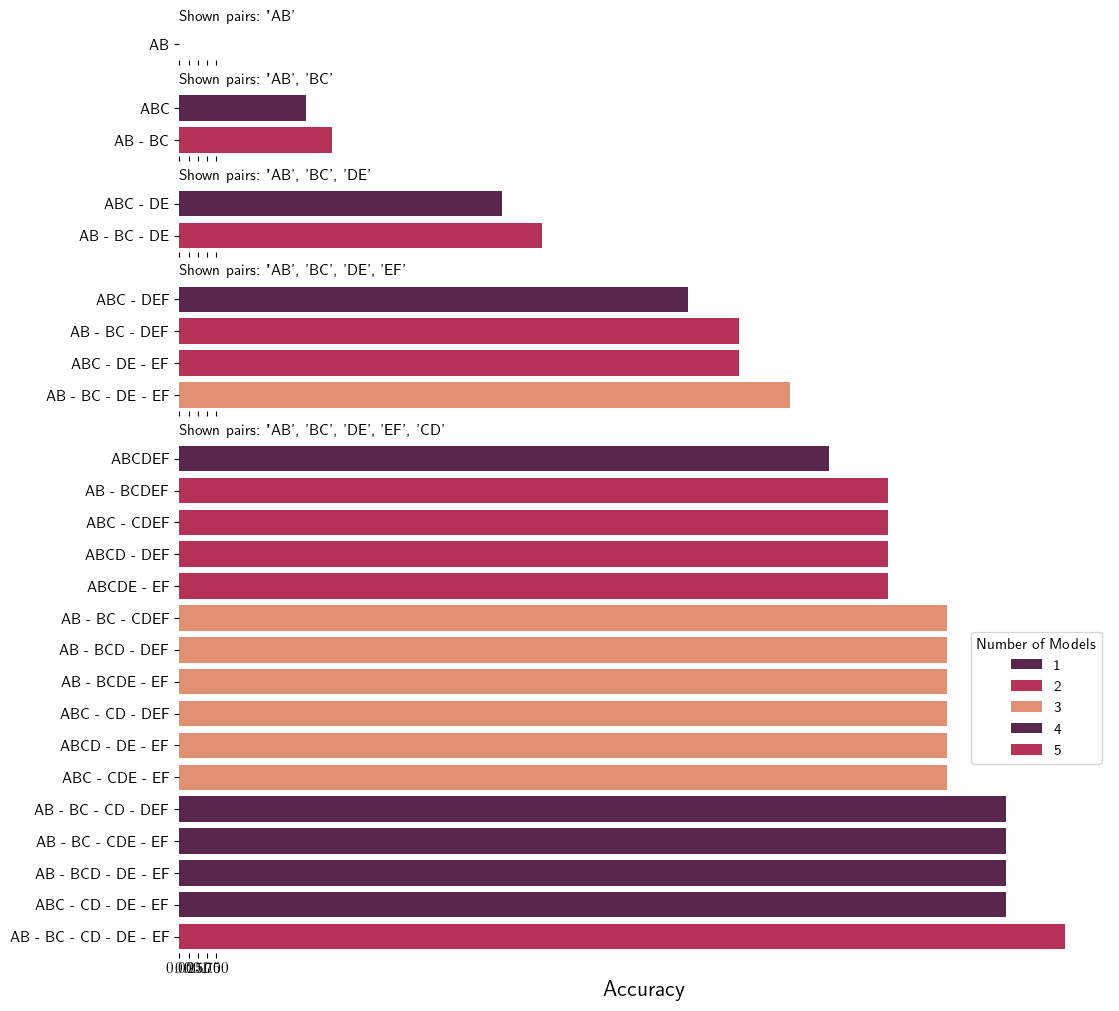

In [44]:
import regex as re
orderer = "bic"

dfs = models_df

dfs = dfs.sort_values(by=['pairs', 'BIC', 'Accuracy', 'model_num'], ascending=[False, True,False, False])
dfs["x"] = [str(x) for x in range(len(dfs))]
dfs["models_idcs"] = [x for x in range(len(dfs))]


ratios = np.array(sorted(dfs.groupby("pairs")["pairs"].count().to_numpy()))
ratios = ratios.astype(float)
ratios /= ratios.max()
fig, axes = plt.subplots(ncols=1,
                         nrows=len(dfs.pairs.unique()),
                         sharex=True,
                         height_ratios = ratios,
                         figsize=(12, 12))

palette = ["#FF4444", "#4444FF", "#44FF44"]
palette = sns.color_palette("rocket", 3)

pairs = dfs.pairs.unique()
for i, pair in enumerate(pairs):
    ax = axes[i]
    df = dfs.query(f"pairs == \"{pair}\"")
    bp = sns.barplot(ax=ax, data=df, x="BIC", y="x", hue="model_num", dodge=False, palette=palette)
    pair = re.sub(r"[\[|\]]","", pair)
    ax.set_title(rf"Shown pairs: \textbf{pair}", loc='left')
    ax.set_ylabel("")
    ax.set_yticks(ax.get_yticks(), labels=df.models)
    if i < len(pairs) -1:
        ax.get_legend().remove()
        ax.set_xticks([])
        ax.set_xlabel("")
    else:
        ax.get_legend()
        ax.get_legend().remove()
        plt.legend(loc='center right', title="Number of Models")
        ax.set_xticks(np.linspace(0,1, 5))
        ax.set_xlabel("Accuracy")


    sns.despine(ax=ax, left=True, bottom=True)

In [45]:
dfs

,BIC,likelihood,loglikelihood,Accuracy,F,model_num,pairs,pairs_n,models,models_n,x,models_idcs
0,0.000000,1.000000,0.000000,1.0,-1.000000,1,['AB'],0,AB,1,0,0
0,3.465736,0.250000,-1.386294,1.0,2.465736,1,"['AB', 'BC']",1,ABC,1,1,1
1,4.158883,0.250000,-1.386294,1.0,3.158883,2,"['AB', 'BC']",1,AB - BC,2,2,2
0,8.788898,0.037037,-3.295837,1.0,7.788898,2,"['AB', 'BC', 'DE']",2,ABC - DE,2,3,3
1,9.887511,0.037037,-3.295837,1.0,8.887511,3,"['AB', 'BC', 'DE']",2,AB - BC - DE,3,4,4
0,13.862944,0.003906,-5.545177,1.0,12.862944,2,"['AB', 'BC', 'DE', 'EF']",3,ABC - DEF,2,5,5
1,15.249238,0.003906,-5.545177,1.0,14.249238,3,"['AB', 'BC', 'DE', 'EF']",3,AB - BC - DEF,3,6,6
2,15.249238,0.003906,-5.545177,1.0,14.249238,3,"['AB', 'BC', 'DE', 'EF']",3,ABC - DE - EF,3,7,7
3,16.635532,0.003906,-5.545177,1.0,15.635532,4,"['AB', 'BC', 'DE', 'EF']",3,AB - BC - DE - EF,4,8,8
0,17.703817,0.000320,-8.047190,1.0,16.703817,1,"['AB', 'BC', 'DE', 'EF', 'CD']",4,ABCDEF,1,9,9


In [46]:
dfs = dfs.sort_values(by=["model_num", "models"])
dfs["models_idcs"] = [x for x in range(len(dfs))]
for mn in dfs.models_n.unique():
    dfs.loc[dfs.models_n == mn, "models_idcs"] += mn
labels = ["" for x in range(dfs.models_idcs.max()+1)]
for idx in dfs.models_idcs:
    labels[idx] = dfs.loc[dfs.models_idcs == idx, "models"].to_numpy()[0]
dfs["rBIC"] = np.exp(-0.5*(10**-2)*dfs.BIC.to_numpy()**2)


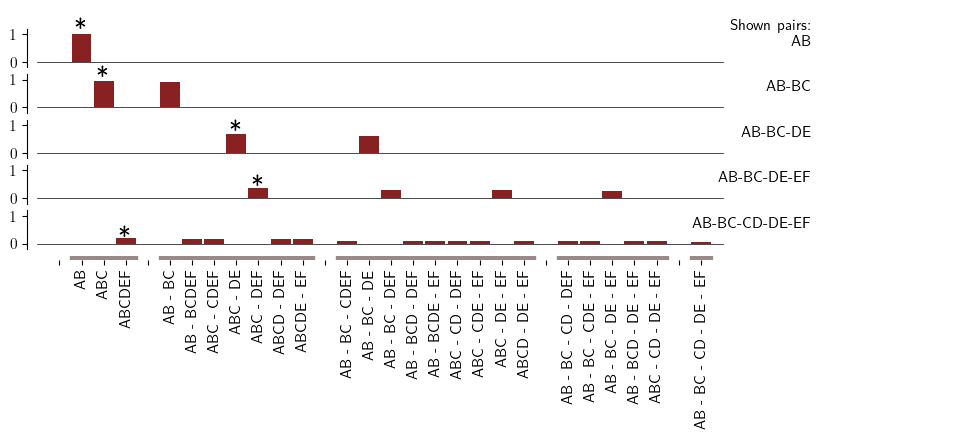

In [47]:

from matplotlib.patches import Rectangle
fig, axs = plt.subplots(6, 1,
                        gridspec_kw={
                            "width_ratios":(1,),
                            "height_ratios":[1,1,1,1,1,0.1],
                            },
                        figsize=(12, 3),
                    )

ppairs= ["AB","AB-BC","AB-BC-DE", "AB-BC-DE-EF","AB-BC-CD-DE-EF" ]

for p in range(n-1):
    df = dfs.query(f'pairs_n=={p}').sort_values(by=["model_num", "models"])
    color = plt.cm.hot(0.9*(1 - (df.rBIC**1.2)/df.rBIC.max()))
    axs[p].bar(x=df.models_idcs, height=df.rBIC, color="#882222", width=0.9)
    axs[p].plot([-1, dfs.models_idcs.max()+1], [0,0], c="black", lw=0.5)
    _ = axs[p].set_xlim(-0.05*dfs.models_idcs.max(), dfs.models_idcs.max()*1.4)
    _ = axs[p].set_ylim(-0.2*dfs.rBIC.max(), dfs.rBIC.max()*1.2)
    axs[p].spines[["right","top", "bottom"]].set_visible(False)
    _ = axs[p].set_xticks([])
    if p ==0:
        axs[p].text(34, 0.6,f"Shown pairs:\n{ppairs[p]}", ha="right")
    else:
        axs[p].text(34, 0.6,f"{ppairs[p]}", ha="right")

    axs[p].text(df.models_idcs[0], df.rBIC[0]+df.rBIC.max()*0.2, "*", ha="center", size=20)

_ = axs[p+1].set_xlim(-0.05*dfs.models_idcs.max(), dfs.models_idcs.max()*1.4)
axs[p+1].spines[["right","top", "left", "bottom"]].set_visible(False)
axs[p+1].set_yticks([])
_ = axs[p+1].set_xticks(np.arange(dfs.models_idcs.max()+1), labels=labels, rotation=90)
rec = Rectangle([.5, 0], 3, 1, color="#988")
axs[p+1].add_patch(rec)
rec = Rectangle([4.5, 0], 7, 1, color="#988")
axs[p+1].add_patch(rec)
rec = Rectangle([12.5, 0], 9, 1, color="#988")
axs[p+1].add_patch(rec)
rec = Rectangle([22.5, 0], 5, 1, color="#988")
axs[p+1].add_patch(rec)
rec = Rectangle([28.5, 0], 1, 1, color="#988")
axs[p+1].add_patch(rec)